In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
agent_name  = "vq11"
model_name  = "time"
timing_file = "timing_train.csv"

In [3]:
with open(timing_file, 'r') as file:
    timing_data = np.genfromtxt(file, skip_header = 1)

In [4]:
rounds, step_counts, round_times, avg_step_times, avg_act_times, avg_geo_times, eor_times = timing_data.T

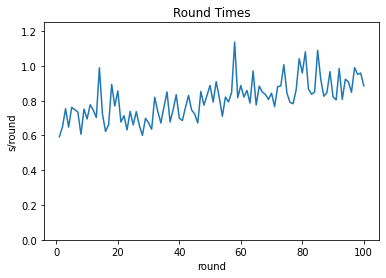

In [5]:
plt.plot(rounds, round_times)
plt.ylim(0, 1.1*max(round_times))
plt.title("Round Times")
plt.xlabel("round")
plt.ylabel("s/round")
plt.show()

In [6]:
print("All rounds have 400 steps:", np.all(400 == step_counts))

All rounds have 400 steps: True


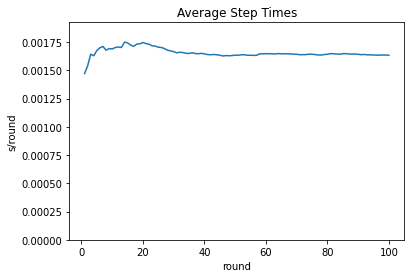

In [7]:
plt.plot(rounds, avg_step_times)
plt.ylim(0, 1.1*max(avg_step_times))
plt.title("Average Step Times")
plt.xlabel("round")
plt.ylabel("s/round")
plt.show()

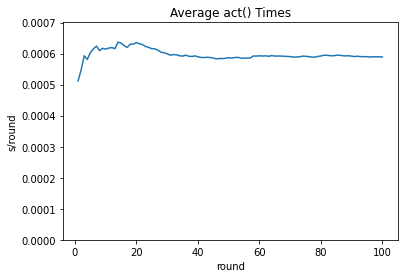

In [8]:
plt.plot(rounds, avg_act_times)
plt.ylim(0, 1.1*max(avg_act_times))
plt.title("Average act() Times")
plt.xlabel("round")
plt.ylabel("s/round")
plt.show()

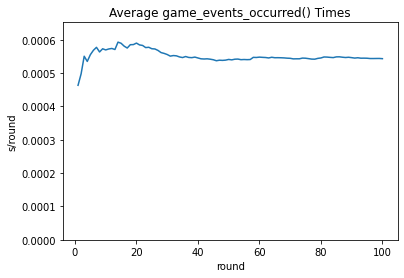

In [9]:
plt.plot(rounds, avg_geo_times)
plt.ylim(0, 1.1*max(avg_geo_times))
plt.title("Average game_events_occurred() Times")
plt.xlabel("round")
plt.ylabel("s/round")
plt.show()

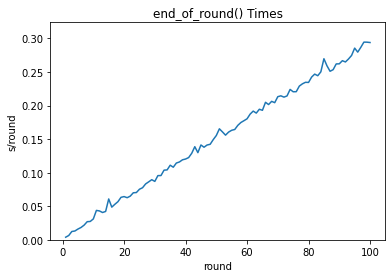

In [10]:
plt.plot(rounds, eor_times)
plt.ylim(0, 1.1*max(eor_times))
plt.title("end_of_round() Times")
plt.xlabel("round")
plt.ylabel("s/round")
plt.show()

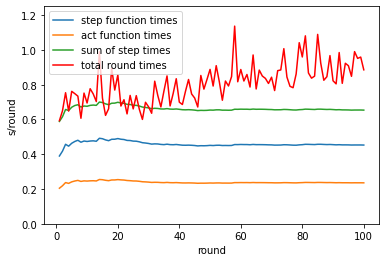

In [11]:
sum_of_act_times = step_counts * avg_act_times
step_functions = step_counts * (avg_act_times + avg_geo_times)
sum_step_times = step_counts * avg_step_times

plt.plot(rounds, step_functions, label = "step function times")
plt.plot(rounds, sum_of_act_times, label = "act function times")
plt.plot(rounds, sum_step_times, label = "sum of step times")
plt.plot(rounds, round_times, 'r', label = "total round times")
plt.ylim(0, 1.1*max(round_times))
plt.xlabel("round")
plt.ylabel("s/round")
plt.legend()
plt.show()


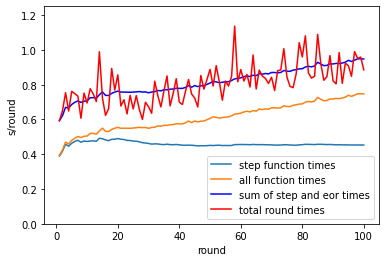

In [12]:
all_functions = step_counts * (avg_act_times + avg_geo_times) + eor_times
steps_and_eor = sum_step_times + eor_times

plt.plot(rounds, step_functions, label = "step function times")
plt.plot(rounds, all_functions, label = "all function times")
plt.plot(rounds, steps_and_eor, 'b', label = "sum of step and eor times")
plt.plot(rounds, round_times, 'r', label = "total round times")
plt.ylim(0, 1.1*max(round_times))
plt.xlabel("round")
plt.ylabel("s/round")
plt.legend()
plt.show()